<a href="https://colab.research.google.com/github/Narissarach/Project_eye/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import PIL
import time
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pickle as p
import pathlib
import plotly
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json
import plotly.graph_objs as go
from tensorflow import keras
from tensorflow.keras.models import Sequential

## เตรียมชุดของข้อมูล

In [2]:
from google.colab import drive # เชื่อม drive ของเรา ถ้าเชื่อมสำเร็จจะขึ้นคำว่า Mounted at /content/drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
batch_size = 64   # กำหนดขนาดของแต่ละการอ่านข้อมูล
img_height = 224  # ความสูงของรูปภาพแต่ละรูป
img_width = 224   # ความกว้างของรูปภาพแต่ละรูป

###Train

In [4]:
#Train
data_train = pathlib.Path('/content/drive/MyDrive/2022Project/Project/Train')
train = tf.keras.utils.image_dataset_from_directory(data_train,image_size=(img_height, img_width))

Found 17742 files belonging to 4 classes.


In [5]:
class_names = train.class_names
print(class_names)

['CSC', 'Normal', 'PCV', 'VKH']


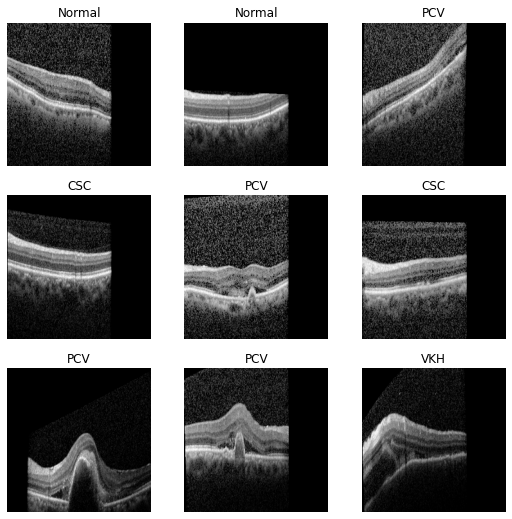

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 9)) #ขนาด
for images, labels in train.take(1):
  for i in range(9): #มี 9 รูป
    ax = plt.subplot(3, 3, i + 1) #แถวละ 3
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


###Validation

In [8]:
#Validation
data_validation = pathlib.Path('/content/drive/MyDrive/2022Project/Project/Validation')
val = tf.keras.utils.image_dataset_from_directory(data_validation,image_size=(img_height, img_width))

Found 2217 files belonging to 4 classes.


In [9]:
class_names = val.class_names
print(class_names)

['CSC', 'Normal', 'PCV', 'VKH']


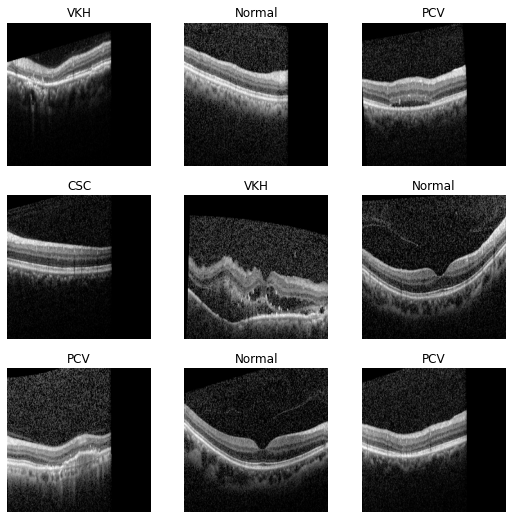

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 9)) #ขนาด
for images, labels in val.take(1):
  for i in range(9): #มี 9 รูป
    ax = plt.subplot(3, 3, i + 1) #แถวละ 3
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in val:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


###Test

In [12]:
#Test
data_test = pathlib.Path('/content/drive/MyDrive/2022Project/Project/Test')
test = tf.keras.utils.image_dataset_from_directory(data_test,image_size=(img_height, img_width))

Found 2182 files belonging to 4 classes.


In [13]:
class_names = test.class_names
print(class_names)

['CSC', 'Normal', 'PCV', 'VKH']


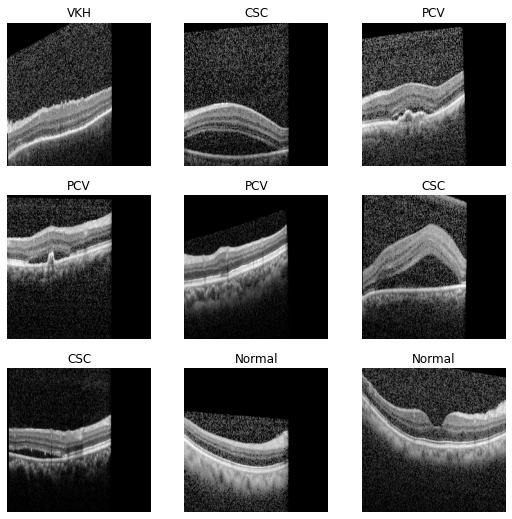

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 9)) #ขนาด
for images, labels in test.take(1):
  for i in range(9): #มี 9 รูป
    ax = plt.subplot(3, 3, i + 1) #แถวละ 3
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
for image_batch, labels_batch in test:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


## Normalization

In [16]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1. / 255)
normalized_ds = train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.9968989


## Training

### Model

In [17]:
num_classes = 4
epochs=5   # จำนวนครั้งที่เราจะ Train

In [18]:
model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [21]:
his = model.fit(
train,
validation_data=val,
epochs=epochs
)

Epoch 1/5
555/555 [==============================] - 2700s 5s/step - loss: 0.8973 - accuracy: 0.6128 - val_loss: 1.1392 - val_accuracy: 0.5891
Epoch 2/5
555/555 [==============================] - 778s 1s/step - loss: 0.2579 - accuracy: 0.9097 - val_loss: 1.6576 - val_accuracy: 0.6152
Epoch 3/5
555/555 [==============================] - 808s 1s/step - loss: 0.0755 - accuracy: 0.9736 - val_loss: 2.4178 - val_accuracy: 0.5959
Epoch 4/5
555/555 [==============================] - 833s 1s/step - loss: 0.0317 - accuracy: 0.9897 - val_loss: 2.3050 - val_accuracy: 0.6450
Epoch 5/5
555/555 [==============================] - 874s 2s/step - loss: 0.0257 - accuracy: 0.9913 - val_loss: 2.4705 - val_accuracy: 0.6189


### Save Model

In [22]:
with open('history_model', 'wb') as file:
   p.dump(his.history, file)

filepath='model1.h5'
model.save(filepath)
filepath_model = 'model1.json'
filepath_weights = 'weights_model.h5'
model_json = model.to_json()
with open(filepath_model, "w") as json_file:
   json_file.write(model_json)

model.save_weights('weights_model.h5')
print("Saved model to disk")

Saved model to disk


### Load Model

In [23]:
with open('history_model', 'rb') as file:
   his = p.load(file)

h1 = go.Scatter(y=his['loss'],
mode="lines", line=dict(
width=2,
color='blue'),
name="loss"
)
h2 = go.Scatter(y=his['val_loss'],
mode="lines", line=dict(
width=2,
color='red'),
name="val_loss"
)

data = [h1,h2]
layout1 = go.Layout(title='Loss',
xaxis=dict(title='epochs'),
yaxis=dict(title=' '))
fig1 = go.Figure(data, layout=layout1)
plotly.offline.iplot(fig1, filename="testMNIST")
predict_model = load_model(filepath)
predict_model.summary()
with open(filepath_model, 'r') as f:
   loaded_model_json = f.read()
predict_model = model_from_json(loaded_model_json)
predict_model.load_weights(filepath_weights)
print("Loaded model from disk")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

## Prediction

In [24]:
import requests
from IPython.display import Image
from io import BytesIO

1/1 [==============================] - 0s 424ms/step
CSC tf.Tensor(0.98907965, shape=(), dtype=float32) Normal tf.Tensor(2.1147493e-05, shape=(), dtype=float32) PCV tf.Tensor(0.010861733, shape=(), dtype=float32) VKH tf.Tensor(3.7541333e-05, shape=(), dtype=float32)


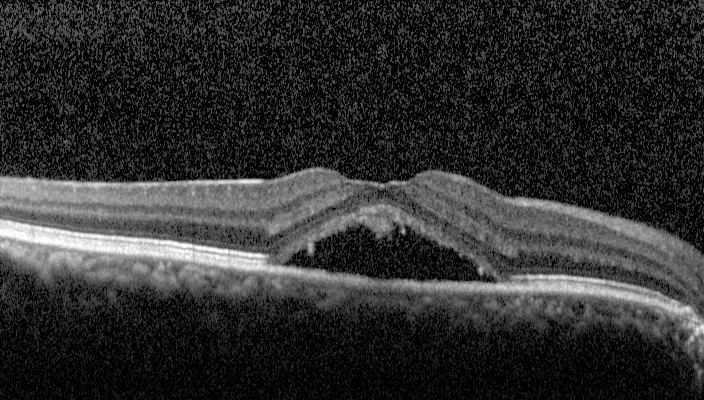

AI CSC มีความมั่นใจ 98.91%.


In [25]:
# CSC
test_path = ('/content/drive/MyDrive/2022Project/Project/Test/CSC/FQ8979 23-03-12 RE_000_cropped.png')
img = keras.preprocessing.image.load_img(
test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = predict_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("CSC",score[0],"Normal",score[1],"PCV",score[2],"VKH",score[3])
display(Image(filename=test_path,width=180, height=180))
if score[0]==np.max(score):
  eye = "CSC"
elif score[1]==np.max(score):
  eye = "Normal"
elif score[2]==np.max(score):
  eye = "PCV"
elif score[3]==np.max(score):
  eye = "VKH"
print(
"AI {} มีความมั่นใจ {:.2f}%."
.format(eye, 100 * np.max(score))
)

1/1 [==============================] - 0s 53ms/step
CSC tf.Tensor(6.989763e-11, shape=(), dtype=float32) Normal tf.Tensor(1.0, shape=(), dtype=float32) PCV tf.Tensor(9.141792e-11, shape=(), dtype=float32) VKH tf.Tensor(2.0370239e-09, shape=(), dtype=float32)


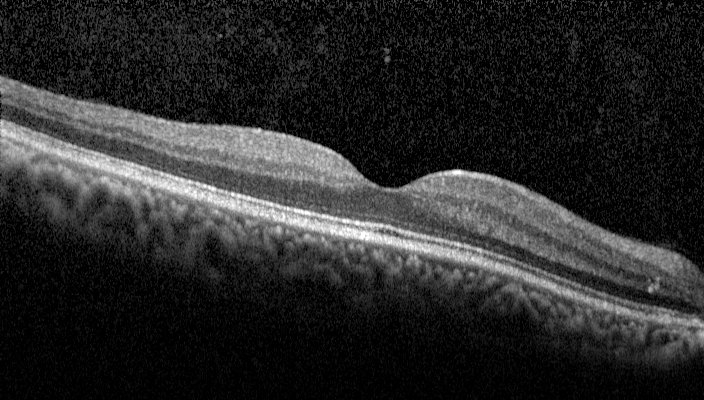

AI Normal มีความมั่นใจ 100.00%.


In [26]:
# Normal
test_path = ('/content/drive/MyDrive/2022Project/Project/Test/Normal/CJ5901 24-01-19 RE_000_cropped.png')
img = keras.preprocessing.image.load_img(
test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = predict_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("CSC",score[0],"Normal",score[1],"PCV",score[2],"VKH",score[3])
display(Image(filename=test_path,width=180, height=180))
if score[0]==np.max(score):
  eye = "CSC"
elif score[1]==np.max(score):
  eye = "Normal"
elif score[2]==np.max(score):
  eye = "PCV"
elif score[3]==np.max(score):
  eye = "VKH"
print(
"AI {} มีความมั่นใจ {:.2f}%."
.format(eye, 100 * np.max(score))
)

1/1 [==============================] - 0s 39ms/step
CSC tf.Tensor(3.5066023e-07, shape=(), dtype=float32) Normal tf.Tensor(0.012164979, shape=(), dtype=float32) PCV tf.Tensor(0.98783326, shape=(), dtype=float32) VKH tf.Tensor(1.4444795e-06, shape=(), dtype=float32)


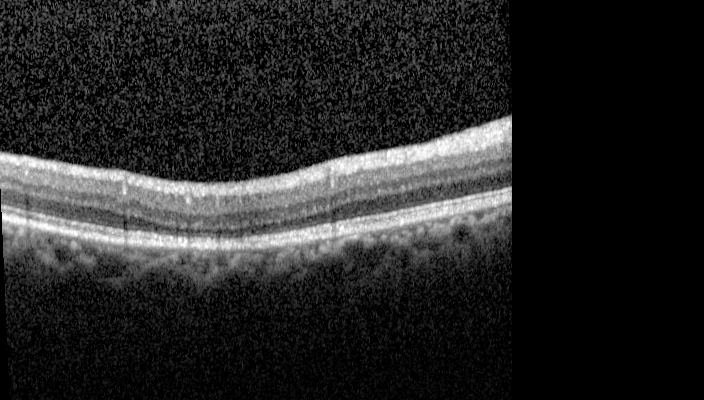

AI PCV มีความมั่นใจ 98.78%.


In [27]:
# PCV
test_path = ('/content/drive/MyDrive/2022Project/Project/Test/PCV/AV0940 20-02-15 RE_000000_cropped.png')
img = keras.preprocessing.image.load_img(
test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = predict_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("CSC",score[0],"Normal",score[1],"PCV",score[2],"VKH",score[3])
display(Image(filename=test_path,width=180, height=180))
if score[0]==np.max(score):
  eye = "CSC"
elif score[1]==np.max(score):
  eye = "Normal"
elif score[2]==np.max(score):
  eye = "PCV"
elif score[3]==np.max(score):
  eye = "VKH"
print(
"AI {} มีความมั่นใจ {:.2f}%."
.format(eye, 100 * np.max(score))
)

1/1 [==============================] - 0s 51ms/step
CSC tf.Tensor(1.1095563e-05, shape=(), dtype=float32) Normal tf.Tensor(2.2609066e-10, shape=(), dtype=float32) PCV tf.Tensor(8.141427e-06, shape=(), dtype=float32) VKH tf.Tensor(0.9999808, shape=(), dtype=float32)


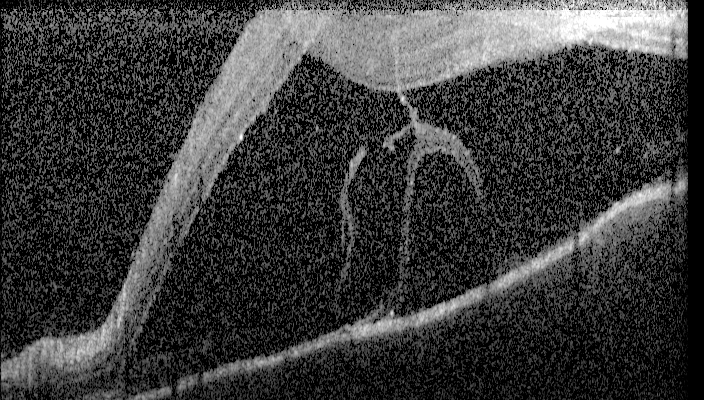

AI VKH มีความมั่นใจ 100.00%.


In [28]:
# VKH
test_path = ('/content/drive/MyDrive/2022Project/Project/Test/VKH/KH7322 18-12-20 LE_000000_cropped.png')
img = keras.preprocessing.image.load_img(
test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = predict_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("CSC",score[0],"Normal",score[1],"PCV",score[2],"VKH",score[3])
display(Image(filename=test_path,width=180, height=180))
if score[0]==np.max(score):
  eye = "CSC"
elif score[1]==np.max(score):
  eye = "Normal"
elif score[2]==np.max(score):
  eye = "PCV"
elif score[3]==np.max(score):
  eye = "VKH"
print(
"AI {} มีความมั่นใจ {:.2f}%."
.format(eye, 100 * np.max(score))
)

## Testing

In [29]:
y_test = []; y_pred = []
class_names = test.class_names
for images, labels in test:
  for i in range(len(list(labels))):
    img_array = keras.preprocessing.image.img_to_array(images[i])
    X_test = tf.expand_dims(img_array, 0)
    score = predict_model.predict(X_test)
    if score[0][0]==np.max(score):
      eye = "CSC"
    elif score[0][1]==np.max(score):
      eye = "Normal"
    elif score[0][2]==np.max(score):
      eye = "PCV"
    elif score[0][3]==np.max(score):
      eye = "VKH"
    y_pred.append(eye)
    y_test.append(class_names[labels[i]])

1/1 [==============================] - 0s 41ms/step


In [30]:
print(y_test)
print(len(y_test))
print(y_pred)
print(len(y_pred))

['VKH', 'Normal', 'VKH', 'CSC', 'PCV', 'Normal', 'VKH', 'CSC', 'Normal', 'VKH', 'Normal', 'Normal', 'CSC', 'Normal', 'PCV', 'VKH', 'CSC', 'Normal', 'VKH', 'CSC', 'VKH', 'PCV', 'Normal', 'CSC', 'Normal', 'CSC', 'Normal', 'CSC', 'Normal', 'PCV', 'PCV', 'VKH', 'Normal', 'VKH', 'Normal', 'Normal', 'VKH', 'PCV', 'VKH', 'VKH', 'VKH', 'CSC', 'Normal', 'CSC', 'Normal', 'PCV', 'PCV', 'CSC', 'VKH', 'CSC', 'CSC', 'CSC', 'VKH', 'CSC', 'Normal', 'PCV', 'VKH', 'CSC', 'PCV', 'Normal', 'Normal', 'CSC', 'CSC', 'VKH', 'CSC', 'Normal', 'VKH', 'CSC', 'Normal', 'CSC', 'CSC', 'VKH', 'Normal', 'PCV', 'PCV', 'CSC', 'Normal', 'CSC', 'PCV', 'VKH', 'Normal', 'PCV', 'Normal', 'CSC', 'PCV', 'VKH', 'VKH', 'Normal', 'CSC', 'VKH', 'Normal', 'Normal', 'Normal', 'CSC', 'PCV', 'Normal', 'Normal', 'Normal', 'VKH', 'CSC', 'VKH', 'VKH', 'CSC', 'PCV', 'Normal', 'VKH', 'PCV', 'Normal', 'Normal', 'Normal', 'CSC', 'CSC', 'Normal', 'Normal', 'CSC', 'VKH', 'PCV', 'PCV', 'CSC', 'VKH', 'VKH', 'Normal', 'PCV', 'VKH', 'Normal', 'VKH

# Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
confusion_matrix(y_test, y_pred)

array([[262,  57, 139,  94],
       [ 51, 433,  62,  24],
       [ 23,  79, 384,  42],
       [ 66,  21,  80, 365]])

In [33]:
cm = confusion_matrix(y_test, y_pred)

In [34]:
test.class_names

['CSC', 'Normal', 'PCV', 'VKH']

In [35]:
cm_df = pd.DataFrame(cm,
                     index = ['CSC', 'Normal', 'PCV', 'VKH'], 
                     columns = ['CSC', 'Normal', 'PCV', 'VKH'])

In [36]:
cm_df

,CSC,Normal,PCV,VKH
CSC,262,57,139,94
Normal,51,433,62,24
PCV,23,79,384,42
VKH,66,21,80,365


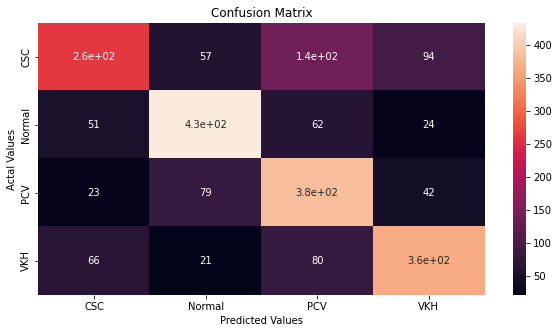

In [37]:
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### หาค่า Accuracy,Recall, Precision, F1-score

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [48]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

Accuracy: 0.661778


In [62]:
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='weighted') ### ในส่วนของ average='weighted' หนูไม่มั่นใจว่าควรใส่เป็น macro, micro หรือ weight
print('Recall: %f' % recall)

Recall: 0.661778


In [63]:
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='weighted') ### ในส่วนของ average='weighted' หนูไม่มั่นใจว่าควรใส่เป็น macro, micro หรือ weight
print('Precision: %f' % precision)

Precision: 0.665830


In [61]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='weighted') ### ในส่วนของ average='weighted' หนูไม่มั่นใจว่าควรใส่เป็น macro, micro หรือ weight
print('F1 score: %f' % f1)

F1 score: 0.658134


# Learning curve

**ข้อมูลจากงานคนอื่น ยังไม่ลองใช้กับข้อมูลภาพตาค่ะ**

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import learning_curve

In [65]:
cancer = datasets.load_breast_cancer()

X, y = cancer.data, cancer.target

In [66]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [67]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

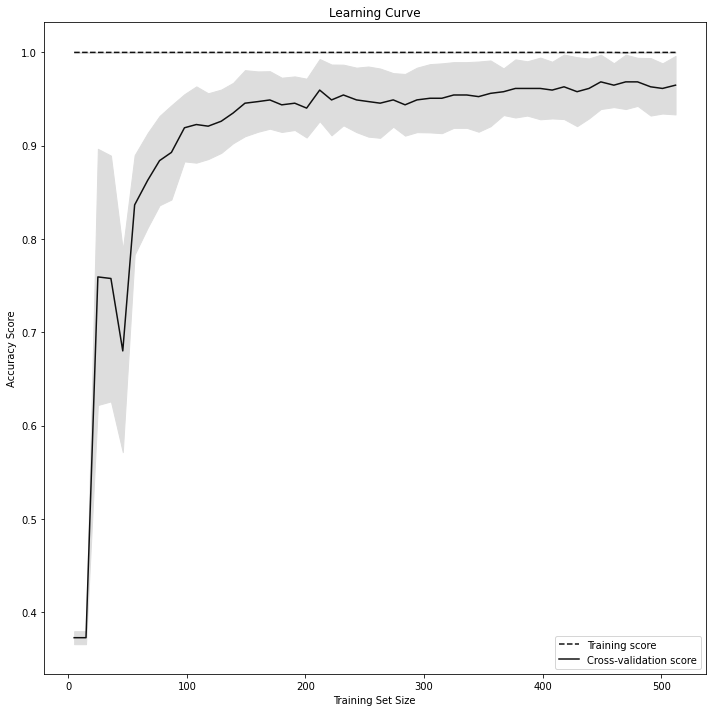

In [68]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()